In [ ]:
import pandas as pd
df_train = pd.read_csv("/content/mnist_train.csv")
xtrain = df_train.drop("label",axis=1).values
xtrain = xtrain.reshape((60000,28,28,1))/255
ytrain = df_train["label"]

In [ ]:
df_test = pd.read_csv("/content/mnist_test.csv")
xtest = df_test.drop("label",axis=1).values
xtest = xtest.reshape((10000,28,28,1))/255
ytest = df_test["label"]

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dropout,Dense,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (28, 28, 1), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_1 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_10 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
h = model.fit(xtrain,ytrain,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
1875/1875 [==============================] - 177s 95ms/step - loss: 0.2181 - accuracy: 0.9329 - val_loss: 0.1076 - val_accuracy: 0.9677
Epoch 2/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.1230 - accuracy: 0.9632 - val_loss: 0.0724 - val_accuracy: 0.9770
Epoch 3/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0925 - accuracy: 0.9720 - val_loss: 0.0693 - val_accuracy: 0.9799
Epoch 4/10
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0716 - accuracy: 0.9786 - val_loss: 0.0610 - val_accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 175s 93ms/step - loss: 0.0617 - accuracy: 0.9816 - val_loss: 0.0433 - val_accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0503 - accuracy: 0.9845 - val_loss: 0.0444 - val_accuracy: 0.9861
Epoch 7/10
1875/1875 [==============================] - 174s 93ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0

In [ ]:
tl,ta = model.evaluate(xtest,ytest)
ta

313/313 [==============================] - 8s 26ms/step - loss: 0.0456 - accuracy: 0.9885


0.9884999990463257

313/313 [==============================] - 13s 40ms/step
4 4


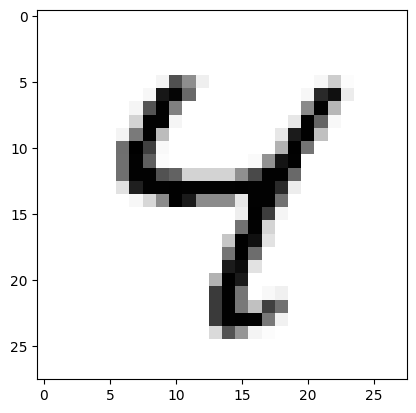

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.imshow(xtest.reshape((10000,28,28))[6],cmap="Greys")
yp = model.predict(xtest)
va = np.argmax(yp[6])
print(va,ytest[6])